**Linear vs Polynomial Regression**


**Introduction: When and Why to Use Polynomial Regression**


Polynomial regression is used when the relationship between the independent variable (X) and the dependent variable (y) is **non-linear**. If a linear model underfits the data, polynomial regression may improve model accuracy by introducing higher-order terms.



**Polynomial Regression Formula**

The general formula for a**polynomial regression** of degree ( n ) is:



Visualizing Dummy Data


Dummy data


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x = np.array([1,2,3,4,5]).reshape(-1,1)
y = np.array([3,6,13,28,55])

Linear Regression


In [61]:
linear_model = LinearRegression()
linear_model.fit(x, y)
y_pred_linear = linear_model.predict(x)

Polynomial Regression (degree 2)


In [62]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
poly_model = LinearRegression()
poly_model.fit(x_poly,y)
y_pred_poly = poly_model.predict(x_poly)
print(y_pred_poly)

[ 3.8  4.4 13.  29.6 54.2]


Plot


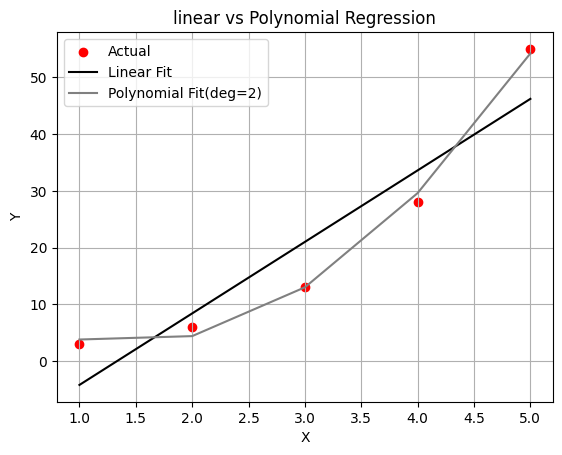

In [63]:
plt.scatter(x,y,color='red',label='Actual')
plt.plot(x, y_pred_linear,label='Linear Fit',color='black')
plt.plot(x,y_pred_poly,label='Polynomial Fit(deg=2)',color='grey')
plt.title('linear vs Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


Real Dataset: Salary Prediction


In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

Load dataset

In [50]:
df = pd.read_csv("https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Salary_Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


In [65]:
df.isnull().sum()

,0
Years of Experience,0
Salary,0


In [66]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Years of Experience,0
Salary,0


Train-test split

In [67]:
x = df[["Years of Experience"]]
y = df["Salary"]

x_train, x_test, y_train, y_text = train_test_split(x,y,test_size=0.2, random_state=42)

Linear Regression

Train linear regression

In [68]:
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)
y_pred_lin = lin_model.predict(x_test)

Metxix

In [69]:
mse_lin = mean_squared_error(y_text,y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_text,y_pred_lin)
print("MSE:",mse_lin)
print("RMSE:",rmse_lin)
print("R2:",r2_lin)


MSE: 946833177.7094355
RMSE: 30770.654489455297
R2: 0.6669549610495003


Polynomial Regression (Degrees 2 and 4)


Degree 2


In [70]:
poly2 = PolynomialFeatures(degree=4)
X_train_poly2 = poly2.fit_transform(x_train)
x_test_poly2 = poly2.transform(x_test)

poly2_model = LinearRegression()
poly2_model.fit(X_train_poly2,y_train)
y_pred_poly2 = poly2_model.predict(x_test_poly2)




Metrics

In [72]:
mse_poly2 = mean_squared_error(y_text,y_pred_poly2)
rmse_poly2 = np.sqrt(mse_poly2)
r2_poly2 = r2_score(y_text,y_pred_poly2)

Degree 4

In [73]:
poly4 = PolynomialFeatures(degree=4)
X_train_poly4 = poly4.fit_transform(x_train)
x_test_poly4 = poly4.transform(x_test)

poly4_model = LinearRegression()
poly4_model.fit(X_train_poly4,y_train)
y_pred_poly4 = poly4_model.predict(x_test_poly4)

Metrics

In [75]:
mse_poly4 = mean_squared_error(y_text,y_pred_poly4)
rmse_poly4 = np.sqrt(mse_poly4)
r2_poly4 = r2_score(y_text,y_pred_poly4)

print("\nPolynomial Regression (Degree 2)")
print("MSE:",mse_poly2)
print("RMSE:",rmse_poly2)
print("R2:Score",r2_poly2)

print("\nPolynomial Regression (Degree 4)")
print("MSE:",mse_poly4)
print("RMSE:",rmse_poly4)
print("R2:Score",r2_poly4)


Polynomial Regression (Degree 2)
MSE: 720033651.6859531
RMSE: 26833.44278481524
R2:Score 0.7467308484568018

Polynomial Regression (Degree 4)
MSE: 720033651.6859531
RMSE: 26833.44278481524
R2:Score 0.7467308484568018


Visualization of All Models

Generate smooth line for predictions

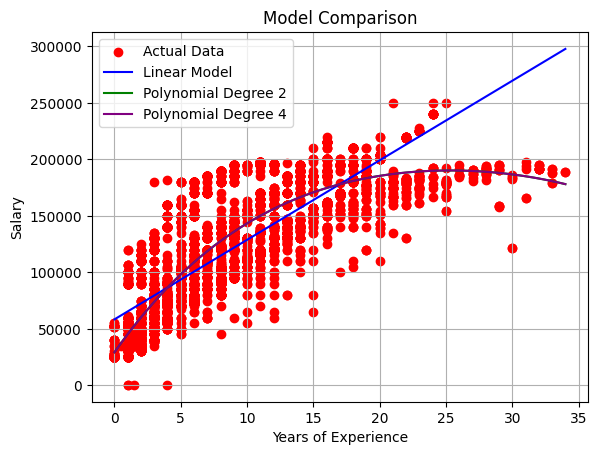

In [77]:
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)

# Create DataFrame with column name
X_range_df = pd.DataFrame(x_range, columns=["Years of Experience"])

# Transform using polynomial features
X_range_poly2 = poly2.transform(X_range_df)
X_range_poly4 = poly4.transform(X_range_df)

# Predict using models
y_range_lin = lin_model.predict(X_range_df)
y_range_poly2 = poly2_model.predict(X_range_poly2)
y_range_poly4 = poly4_model.predict(X_range_poly4)

# Plot
plt.scatter(x, y, color='red', label='Actual Data')
plt.plot(x_range, y_range_lin, label='Linear Model', color='blue')
plt.plot(x_range, y_range_poly2, label='Polynomial Degree 2', color='green')
plt.plot(x_range, y_range_poly4, label='Polynomial Degree 4', color='purple')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Model Comparison")
plt.legend()
plt.grid(True)
plt.show()


Model Performance Comparison